绘制各个实验分析结果

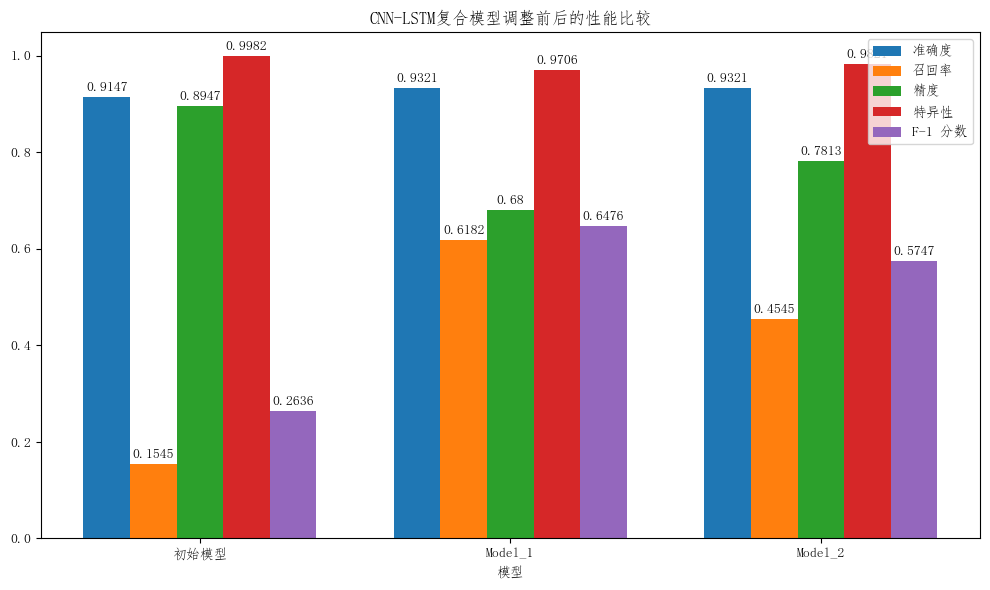

In [5]:
#  图5.3 CNN-LSTM模型调整前后的性能比较
import matplotlib
import matplotlib.pyplot as plt

# 更改字体,仿宋
matplotlib.rc("font",family='FangSong',weight="bold")

# 模型及其性能数据
models = ['初始模型', 'Model_1', 'Model_2']
accuracy = [0.9147, 0.9321, 0.9321]
recall = [0.1545, 0.6182, 0.4545]
precision = [0.8947, 0.68, 0.7813]
specificity = [0.9982, 0.9706, 0.9821]
f1_score = [0.2636, 0.6476, 0.5747]

# 创建条形图
x = range(len(models))  # 模型标签的位置
width = 0.15  # 条形的宽度

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, accuracy, width, label='准确度')
rects2 = ax.bar([p + width for p in x], recall, width, label='召回率')
rects3 = ax.bar([p + width*2 for p in x], precision, width, label='精度')
rects4 = ax.bar([p + width*3 for p in x], specificity, width, label='特异性')
rects5 = ax.bar([p + width*4 for p in x], f1_score, width, label='F-1 分数')

# 添加标签、标题和自定义的x轴刻度标签等
ax.set_xlabel('模型')
ax.set_title('CNN-LSTM复合模型调整前后的性能比较')
ax.set_xticks([p + width*2 for p in x])
ax.set_xticklabels(models)
ax.legend()

# 在条形图上添加数据标签
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
ax.bar_label(rects5, padding=3)

fig.tight_layout()

plt.show()


In [3]:
# 查询当前系统所有字体
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	Agency FB
	Algerian
	Arial
	Arial Rounded MT Bold
	Bahnschrift
	Baskerville Old Face
	Bauhaus 93
	Bell MT
	Berlin Sans FB
	Berlin Sans FB Demi
	Bernard MT Condensed
	Blackadder ITC
	Bodoni MT
	Book Antiqua
	Bookman Old Style
	Bookshelf Symbol 7
	Bradley Hand ITC
	Britannic Bold
	Broadway
	Brush Script MT
	Calibri
	Californian FB
	Calisto MT
	Cambria
	Candara
	Castellar
	Centaur
	Century
	Century Gothic
	Century Schoolbook
	Chiller
	Colonna MT
	Comic Sans MS
	Consolas
	Constantia
	Cooper Black
	Copperplate Gothic Bold
	Copperplate Gothic Light
	Corbel
	Courier New
	Curlz MT
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	DengXian
	Dubai
	Ebrima
	Edwardian Script ITC
	Elephant
	Engravers MT
	Eras Bold ITC
	Eras Demi ITC
	Eras Light ITC
	Eras Medium ITC
	FZShuTi
	FZYaoTi
	FangSong
	Felix Titling
	Footlight MT Light
	Forte
	Franklin Gothic Book
	Franklin Gothic Demi
	Franklin Gothic Demi Cond
	Frankli

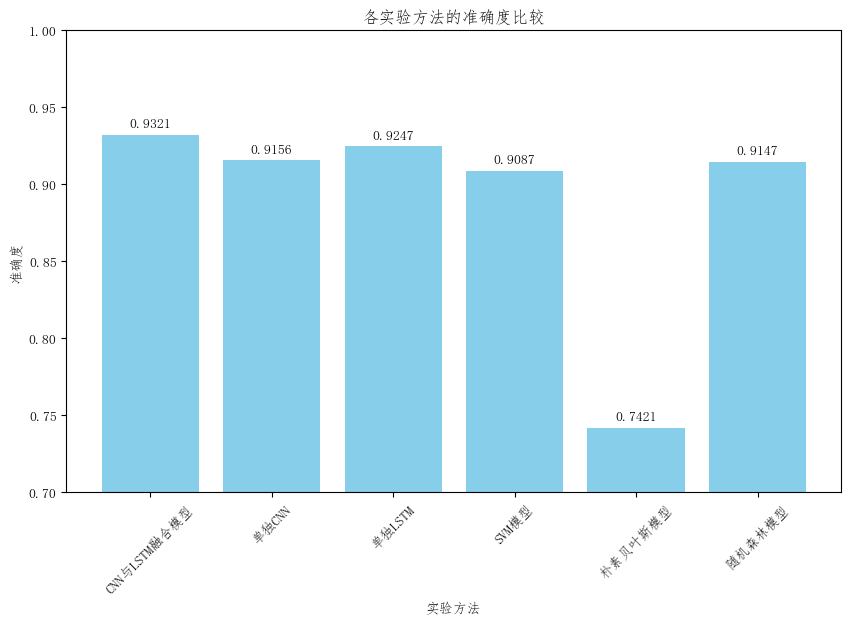

In [3]:
# 准确度分析
import matplotlib
import matplotlib.pyplot as plt

# 更改字体,仿宋
matplotlib.rc("font",family='FangSong',weight="bold")

# 实验方法及其准确度数据
methods = ['CNN与LSTM融合模型', '单独CNN', '单独LSTM', 'SVM模型', '朴素贝叶斯模型', '随机森林模型']
accuracy = [0.9321, 0.9156, 0.9247, 0.9087, 0.7421, 0.9147]

# 创建准确度的条形图
plt.figure(figsize=(10, 6))
plt.bar(methods, accuracy, color='skyblue')
plt.xlabel('实验方法')
plt.ylabel('准确度')
plt.title('各实验方法的准确度比较')
plt.ylim(0.7, 1.0)  # 设置y轴的范围
plt.xticks(rotation=45)  # 旋转x轴标签，避免重叠

# 在每个条形上显示数值
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center')

plt.show()


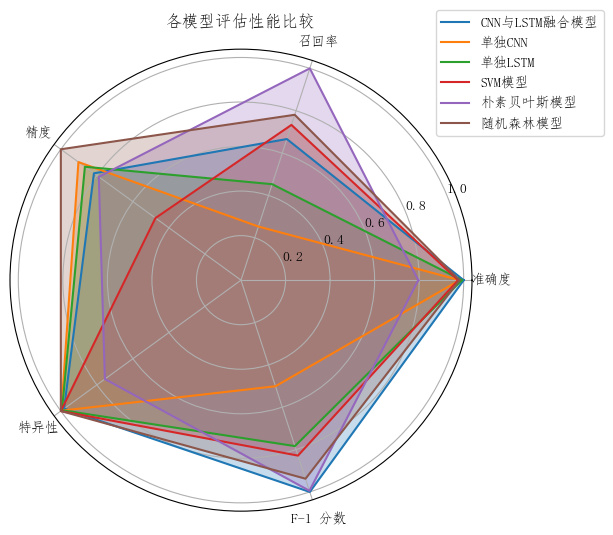

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 实验方法及其多个指标数据
labels = np.array(['准确度', '召回率', '精度', '特异性', 'F-1 分数'])
methods = ['CNN与LSTM融合模型', '单独CNN', '单独LSTM', 'SVM模型', '朴素贝叶斯模型', '随机森林模型']
stats = np.array([
    [0.9321, 0.4545, 0.7813, 0.9821, 0.5747],
    [0.9156, 0.1727, 0.8636, 0.9972, 0.2879],
    [0.9247, 0.3091, 0.8293, 0.9936, 0.4503],
    [0.9087, 0.5, 0.4544, 1.0, 0.4761],
    [0.7421, 0.6821, 0.7555, 0.7555, 0.5715],
    [0.9147, 0.5326, 0.9571, 1.0, 0.5388]
])

# 数据归一化，使得雷达图更加整洁
stats_normalized = stats / stats.max(axis=0)

# 雷达图所需的角度设置
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats_normalized = np.concatenate((stats_normalized, stats_normalized[:, [0]]), axis=1)  # 闭合数据
angles += angles[:1]  # 闭合图形

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i in range(len(stats)):
    ax.fill(angles, stats_normalized[i], alpha=0.25)
    ax.plot(angles, stats_normalized[i], label=methods[i] ) # 方法标签可以根据实际需要调整

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('各模型评估性能比较')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()



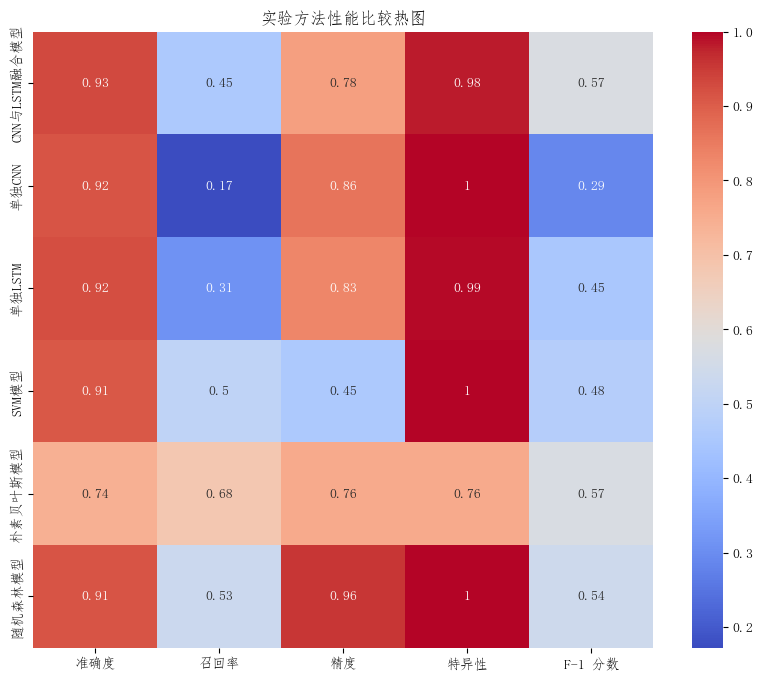

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 实验方法及其多个指标数据
labels = ['准确度', '召回率', '精度', '特异性', 'F-1 分数']
methods = ['CNN与LSTM融合模型', '单独CNN', '单独LSTM', 'SVM模型', '朴素贝叶斯模型', '随机森林模型']
stats = np.array([
    [0.9321, 0.4545, 0.7813, 0.9821, 0.5747],
    [0.9156, 0.1727, 0.8636, 0.9972, 0.2879],
    [0.9247, 0.3091, 0.8293, 0.9936, 0.4503],
    [0.9087, 0.5, 0.4544, 1.0, 0.4761],
    [0.7421, 0.6821, 0.7555, 0.7555, 0.5715],
    [0.9147, 0.5326, 0.9571, 1.0, 0.5388]
])

# 使用Seaborn创建热图
plt.figure(figsize=(10, 8))
ax = sns.heatmap(stats, annot=True, cmap='coolwarm', cbar=True,
                 xticklabels=labels, yticklabels=methods)

plt.title('实验方法性能比较热图')
plt.show()


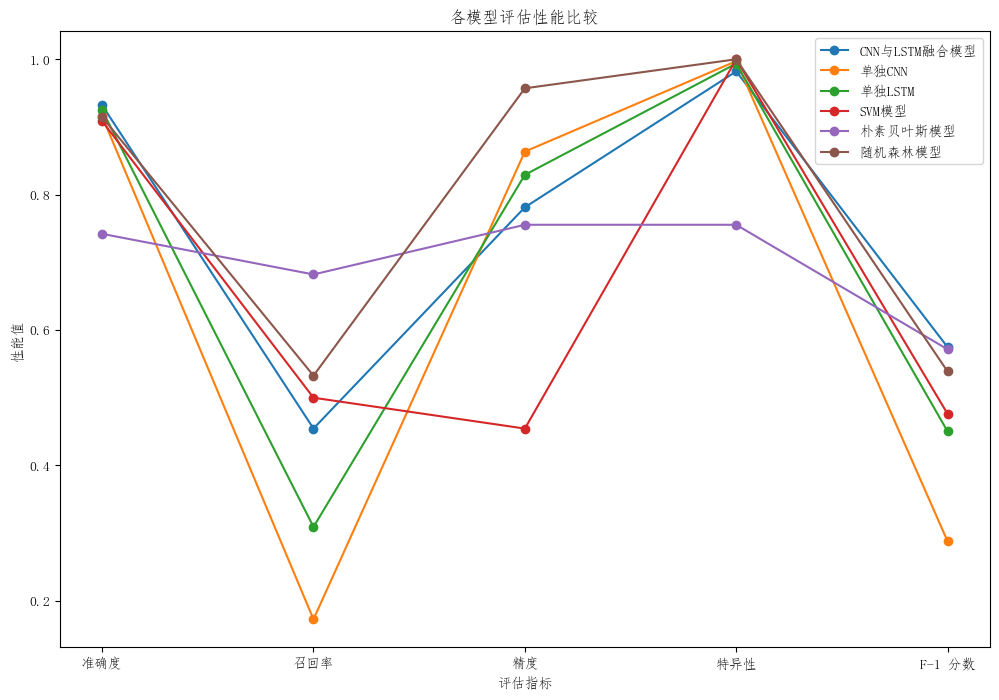

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 实验方法及其多个指标数据
labels = ['准确度', '召回率', '精度', '特异性', 'F-1 分数']
methods = ['CNN与LSTM融合模型', '单独CNN', '单独LSTM', 'SVM模型', '朴素贝叶斯模型', '随机森林模型']
stats = np.array([
    [0.9321, 0.4545, 0.7813, 0.9821, 0.5747],
    [0.9156, 0.1727, 0.8636, 0.9972, 0.2879],
    [0.9247, 0.3091, 0.8293, 0.9936, 0.4503],
    [0.9087, 0.5, 0.4544, 1.0, 0.4761],
    [0.7421, 0.6821, 0.7555, 0.7555, 0.5715],
    [0.9147, 0.5326, 0.9571, 1.0, 0.5388]
])

# 创建图形和轴
fig, ax = plt.subplots(figsize=(12, 8))

# 对每种方法绘制一条线
for i, method in enumerate(methods):
    ax.plot(labels, stats[i], marker='o', label=method)

# 添加标题和标签
ax.set_title('各模型评估性能比较')
ax.set_xlabel('评估指标')
ax.set_ylabel('性能值')
ax.legend()

# 显示图形
plt.show()


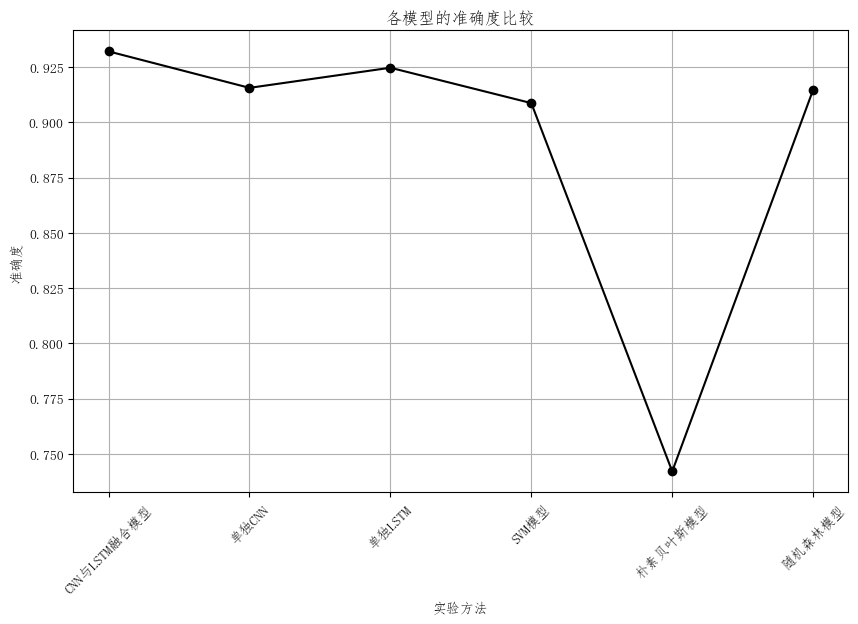

In [18]:
import matplotlib.pyplot as plt

# 实验方法及其准确度数据
methods = ['CNN与LSTM融合模型', '单独CNN', '单独LSTM', 'SVM模型', '朴素贝叶斯模型', '随机森林模型']
accuracy = [0.9321, 0.9156, 0.9247, 0.9087, 0.7421, 0.9147]

# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(methods, accuracy, marker='o', linestyle='-', color='black')
plt.xlabel('实验方法')
plt.ylabel('准确度')
plt.title('各模型的准确度比较')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

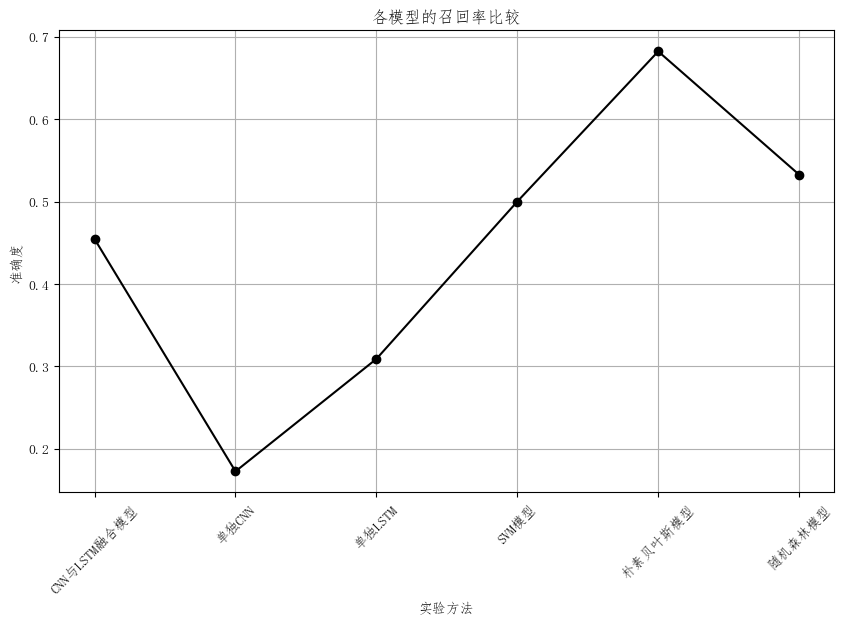

In [19]:
import matplotlib.pyplot as plt

# 实验方法及其准确度数据
methods = ['CNN与LSTM融合模型', '单独CNN', '单独LSTM', 'SVM模型', '朴素贝叶斯模型', '随机森林模型']
accuracy = [0.4545, 0.1727, 0.3091, 0.5, 0.6821, 0.5326]

# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(methods, accuracy, marker='o', linestyle='-', color='black')
plt.xlabel('实验方法')
plt.ylabel('准确度')
plt.title('各模型的召回率比较')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

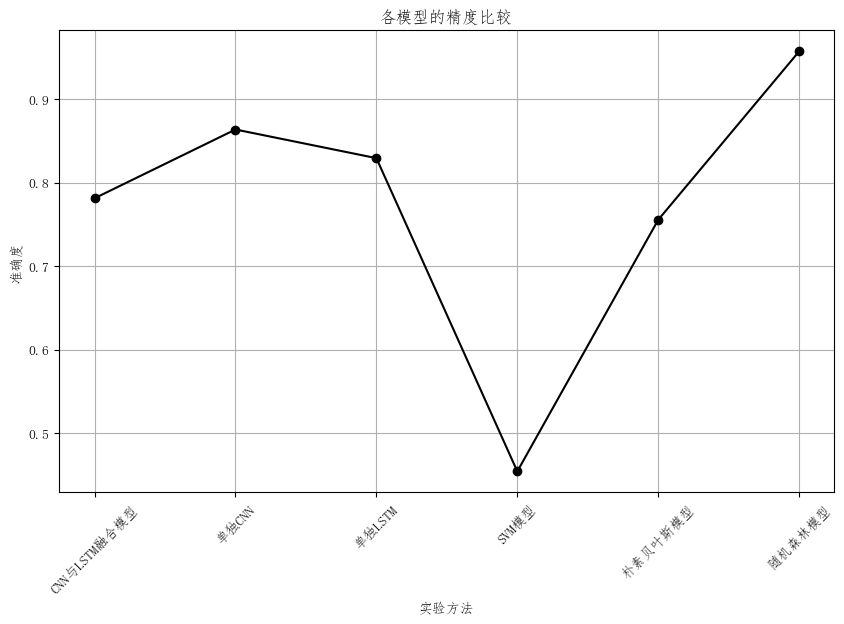

In [20]:
import matplotlib.pyplot as plt

# 实验方法及其准确度数据
methods = ['CNN与LSTM融合模型', '单独CNN', '单独LSTM', 'SVM模型', '朴素贝叶斯模型', '随机森林模型']
accuracy = [0.7813, 0.8636, 0.8293, 0.4544, 0.7555, 0.9571]

# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(methods, accuracy, marker='o', linestyle='-', color='black')
plt.xlabel('实验方法')
plt.ylabel('准确度')
plt.title('各模型的精度比较')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

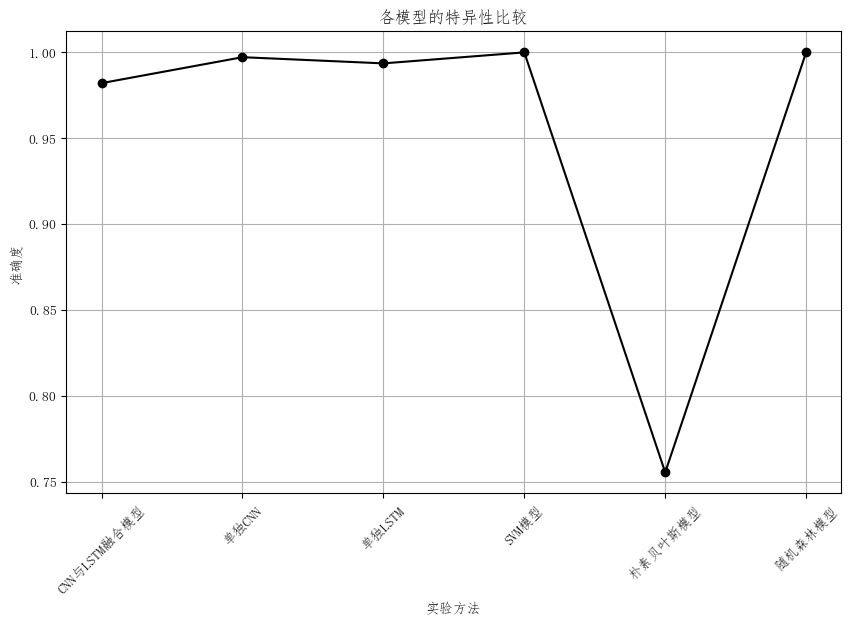

In [21]:
import matplotlib.pyplot as plt

# 实验方法及其准确度数据
methods = ['CNN与LSTM融合模型', '单独CNN', '单独LSTM', 'SVM模型', '朴素贝叶斯模型', '随机森林模型']
accuracy = [0.9821,0.9972,0.9936,1.0,0.7555,1.0]

# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(methods, accuracy, marker='o', linestyle='-', color='black')
plt.xlabel('实验方法')
plt.ylabel('准确度')
plt.title('各模型的特异性比较')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

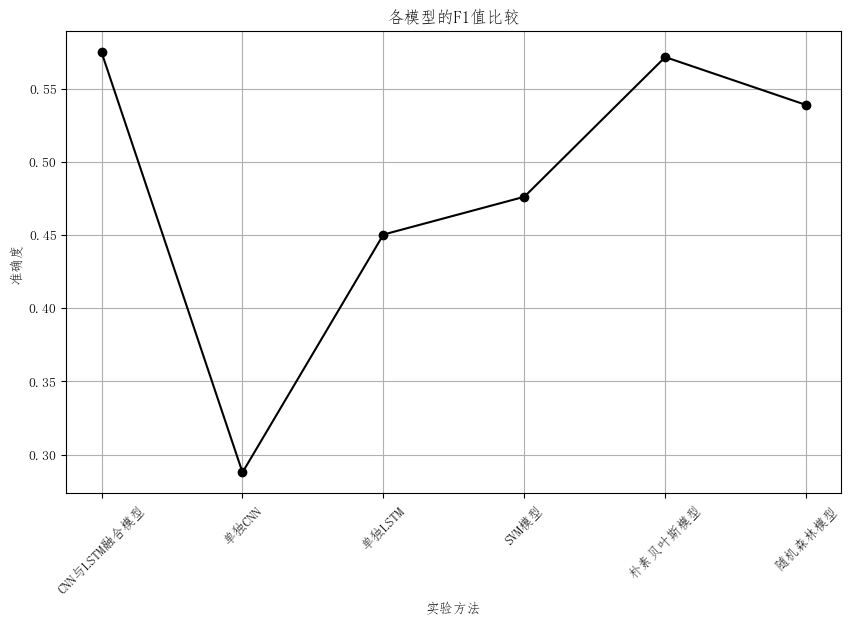

In [22]:
import matplotlib.pyplot as plt

# 实验方法及其准确度数据
methods = ['CNN与LSTM融合模型', '单独CNN', '单独LSTM', 'SVM模型', '朴素贝叶斯模型', '随机森林模型']
accuracy = [0.5747,0.2879,0.4503,0.4761,0.5715,0.5388]

# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(methods, accuracy, marker='o', linestyle='-', color='black')
plt.xlabel('实验方法')
plt.ylabel('准确度')
plt.title('各模型的F1值比较')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()